# 导师制名企实训班商业智能方向 004期 Lesson 2

### Thinking 1:  MVC框架指的是什么

即Model（模型）、View（视图）和Controller（控制），是创建Web应用的一种框架模式  
* Model（模型）： 通常是负责服务端与数据库交互的过程。  
个人理解Model是将与数据库交互的SQL语句与其他服务端代码分隔开，只利用接口来进行数据传输和指令下达，这样可以专注于数据库逻辑的处理，可以避免出现数据安全的问题。
* View（视图） ： 是负责处理数据展示和用户交互的部分。  
个人理解View是将用户交互界面和数据展示界面设计成模板（template），通过Controller控制显示的内容和数据，这样就可以实现复用。
* Controller（控制） ： 负责处理用户交互与控制业务逻辑。
个人理解Controller就是Web应用的处理和控制中枢，接收用户的请求，控制数据库数据提取和存储，向视图发送数据并将结果返回给用户等。  

将各个部分分隔开也便于多人协同工作，比如SQL工程师建库之后根据需要写接口就行了，后端工程师则直接调用接口就可以了，不用考虑数据库内部逻辑了。

### Thinking 2： 基于Python的可视化技术都有哪些，你使用过哪些

#### 按照工具包来分类： 

1. matplotlib : 是Python中比较基础的可视化包。  
2. seaborn ： 是基于matplotlib的高级可视化包。  
3. Pyecharts : 是基于百度echarts的一个开源项目，可以实现交互可视化的工具。  

我只使用过matplotlib，主要在实验前用于查看数据分布，实验后进行结果分析和写论文的时候做数据可视化使用。

#### 按照视图来分来： 

1. 散点图 ： 适合展示两个变量之间的关系。
2. 折线图 ： 用来表示数据随着时间变化的趋势。
3. 直方图 ： 用来可视化数据集的分布。
4. 条形图 ： 通常用来比较各个数据的大小。
5. 饼  图 ： 用来表示各个数据的占比。 
6. 箱线图 ： 用来显示数据分散情况。
7. 热力图 ： 能够显示出重点数据的分布。
8. 蜘蛛图 ： 能够显示各个指标的综合情况。

我主要使用过散点图、折线图、条形图和饼图，在做Attention机制的可视化的时候使用过类似热力图的方式来进行可视化。

### Action 1： 购物篮词云分析

#### 数据集：MarketBasket
下载地址：https://www.kaggle.com/dragonheir/basket-optimisation  
对数据集进行词云可视化展示，可视化探索（Top10的商品有哪些）

In [1]:
# 引包
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize
import nltk

In [2]:
# 加载数据
data = pd.read_csv("data/Market_Basket_Optimisation.csv", header = None)

In [3]:
# 将数据集进行格式转换
transactions = []
item_count = {}
for i in range(data.shape[0]):
    temp = []
    for j in range(data.shape[1]):
        value = str(data.values[i, j])
        if value != "nan":
            temp.append(value)
            if value not in item_count:
                item_count[value] = 1
            else:
                item_count[value] += 1
    transactions.append(temp)
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [4]:
item_count

{'shrimp': 536,
 'almonds': 153,
 'avocado': 250,
 'vegetables mix': 193,
 'green grapes': 68,
 'whole weat flour': 70,
 'yams': 86,
 'cottage cheese': 239,
 'energy drink': 200,
 'tomato juice': 228,
 'low fat yogurt': 574,
 'green tea': 991,
 'honey': 356,
 'salad': 37,
 'mineral water': 1788,
 'salmon': 319,
 'antioxydant juice': 67,
 'frozen smoothie': 475,
 'spinach': 53,
 'olive oil': 494,
 'burgers': 654,
 'meatballs': 157,
 'eggs': 1348,
 'chutney': 31,
 'turkey': 469,
 'milk': 972,
 'energy bar': 203,
 'whole wheat rice': 439,
 'whole wheat pasta': 221,
 'french fries': 1282,
 'soup': 379,
 'light cream': 117,
 'shallot': 58,
 'frozen vegetables': 715,
 'spaghetti': 1306,
 'pet food': 49,
 'cookies': 603,
 'cooking oil': 383,
 'champagne': 351,
 'chocolate': 1230,
 'chicken': 450,
 'oil': 173,
 'fresh tuna': 167,
 'tomatoes': 513,
 'black tea': 107,
 'extra dark chocolate': 90,
 'protein bar': 139,
 'red wine': 211,
 'pasta': 118,
 'pepper': 199,
 'shampoo': 37,
 'rice': 141,


In [5]:
# 提取单词
all_word = " ".join('%s' %item for item in transactions)
all_word

"['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'] ['burgers', 'meatballs', 'eggs'] ['chutney'] ['turkey', 'avocado'] ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'] ['low fat yogurt'] ['whole wheat pasta', 'french fries'] ['soup', 'light cream', 'shallot'] ['frozen vegetables', 'spaghetti', 'green tea'] ['french fries'] ['eggs', 'pet food'] ['cookies'] ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'] ['spaghetti', 'champagne', 'cookies'] ['mineral water', 'salmon'] ['mineral water'] ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'] ['turkey', 'eggs'] ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'] ['

In [6]:
# 去掉停用词
def remove_stop_words(f):
	stop_words = ['Movie']
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f

# 生成词云
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = word_tokenize(f)
	#print(cut_text)
	cut_text = " ".join(cut_text)
	wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    )
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

根据词频，开始生成词云!


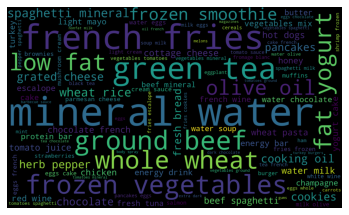

In [7]:
create_word_cloud(all_word)

In [8]:
top_items = sorted(item_count.items(), key=lambda x:x[1], reverse=True)
top_items[:10]

[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713)]

#### Top10 的商品：

In [9]:
pd_data = pd.DataFrame(top_items)[:10]
pd_data

,0,1
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


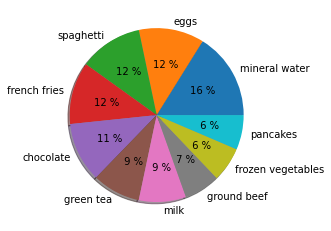

In [10]:
plt.pie(x=pd_data[1], labels=pd_data[0], autopct='%2.f %%', shadow=True)
plt.show()

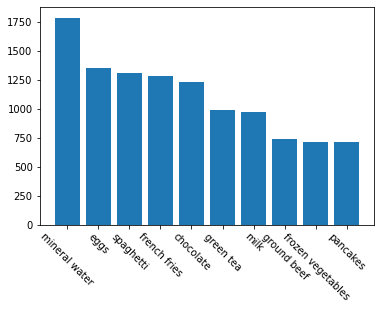

In [11]:
plt.bar(pd_data[0], pd_data[1])
plt.xticks(rotation=-45)
plt.show()